In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

%matplotlib inline

In [29]:
colname = ["id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"]
data = pd.read_csv("Gandum.csv", names=colname)
data

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877,1
4,5,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


# 1. Descriptive Statistics
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis.

In [30]:
def createData(colname):
    attr = data[colname]
    desc = attr.describe()
    newData = [desc[1], desc[5], attr.mode()[0], desc[2], attr.var(), attr.max() - attr.min(), attr.min(), attr.max(), desc[4], desc[5], desc[6], desc[6] - desc[4], attr.skew(), attr.kurtosis()]
    return newData

In [70]:
descstats = []
for i in range (data.columns.size):
    if i in [0,11]:
        continue
    else:
        newdata = createData(data.columns[i])
        descstats.append(newdata)

In [72]:
descstats = pd.DataFrame(data=descstats, index=['Daerah','SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum'], columns=['Mean', 'Median', 'Modus', 'STD', 'Variansi', 'Range', 'Min', 'Max', '25%', '50%', '75%', 'IQR', 'Skewness', 'Kurtosis']).transpose()
descstats

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
Mean,4801.246000,116.045171,53.715246,0.878764,4.937048e+03,77.771158,0.648372,281.479722,0.761737,2.150915
Median,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599
Modus,3992.000000,74.133114,39.906517,0.719916,3.802000e+03,71.293564,0.735849,197.015000,0.174590,1.440796
STD,986.395491,18.282626,4.071075,0.036586,1.011696e+03,8.056867,0.094367,37.335402,0.061702,0.249767
Variansi,972976.065615,334.254412,16.573650,0.001339,1.023529e+06,64.913111,0.008905,1393.932221,0.003807,0.062383
Range,4931.000000,153.795469,29.071182,0.194085,5.141000e+03,40.747172,0.468972,291.822000,0.730158,1.024013
Min,2522.000000,74.133114,39.906517,0.719916,2.579000e+03,56.666658,0.409927,197.015000,0.174590,1.440796
Max,7453.000000,227.928583,68.977700,0.914001,7.720000e+03,97.413830,0.878899,488.837000,0.904748,2.464809
25%,4042.750000,104.116098,51.193576,0.863676,4.170250e+03,71.745308,0.572632,255.883000,0.731991,1.983939
50%,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599


# 2. Distribution Plots
Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik.

In [33]:
def makeplot(name):
    fig, ax = plt.subplots(1,2)
    sns.histplot(data[name], kde=True, ax=ax[0])
    sns.boxplot(x=data[name], ax=ax[1])

### Visualisasi SumbuUtama

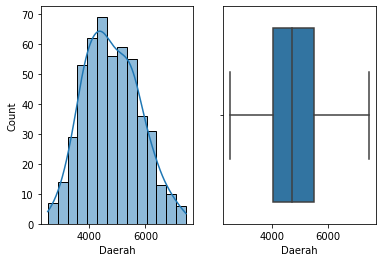

In [73]:
makeplot("Daerah")

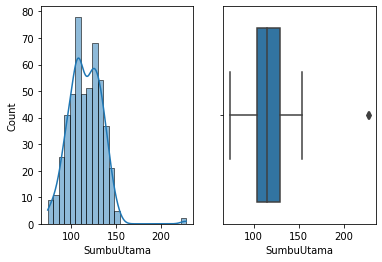

In [34]:
makeplot("SumbuUtama")

### Visualisasi SumbuKecil

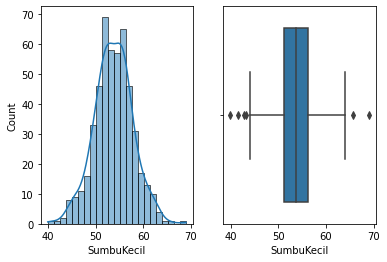

In [35]:
makeplot("SumbuKecil")

### Visualisasi Keunikan

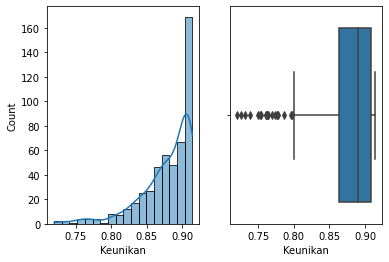

In [36]:
makeplot("Keunikan")

### Visualisasi AreaBulatan

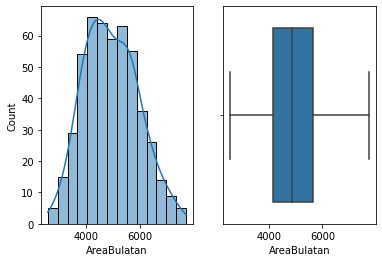

In [37]:
makeplot("AreaBulatan")

### Visualisasi Diameter

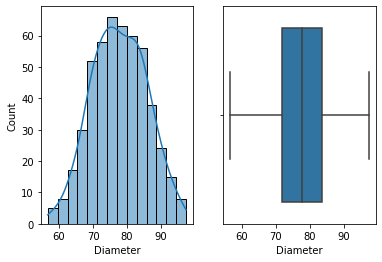

In [38]:
makeplot("Diameter")

### Visualisasi KadarAir

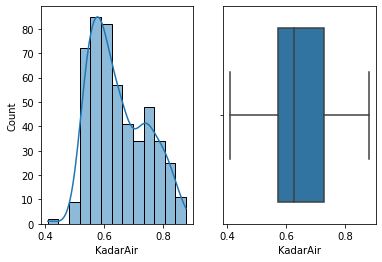

In [39]:
makeplot("KadarAir")

### Visualisasi Keliling

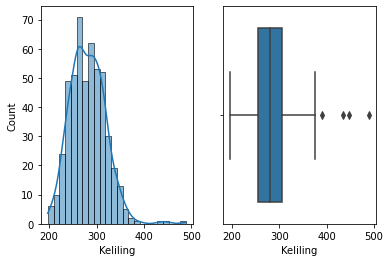

In [40]:
makeplot("Keliling")

### Visualisasi Bulatan

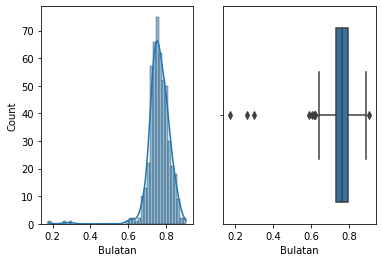

In [41]:
makeplot("Bulatan")

### Visualisasi Ransum

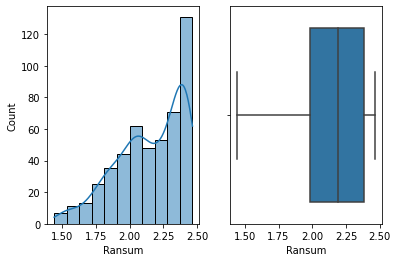

In [42]:
makeplot("Ransum")

# 3. Normality Test
Menentukan setiap kolom numerik berdistribusi normal atau tidak. 

Null hypothesis dipenuhi ketika p-value lebih besar dari alpha, dan ditolak jika p-value lebih kecil sama dengan alpha, 0.05. Ketika null hypothesis terpenuhi, maka sample data diambil dari populasi yang memenuhi Gaussian Normal Distribution.

In [43]:
alpha = 0.05

In [75]:
def normalityTest(colname): 
    global alpha 
    k, p = stats.normaltest(data[colname])
    if p > alpha:
        return True, p
    else:
        return False, p

In [76]:
resnormaltest = []
for i in range (data.columns.size):
    if i in [0,11]:
        continue
    else:
        isnormal, p = normalityTest(data.columns[i])
        resnormaltest.append((isnormal,p))

In [78]:
resnormaltest = pd.DataFrame(data=resnormaltest, index=['Daerah','SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum'], columns=['IsNormal based on p-value', 'p-value'])

resnormaltest

,IsNormal based on p-value,p-value
Daerah,False,4.386272e-03
SumbuUtama,False,2.212743e-21
SumbuKecil,True,1.573634e-01
Keunikan,False,3.602971e-35
AreaBulatan,False,4.657059e-03
Diameter,False,2.415720e-02
KadarAir,False,2.586936e-11
Keliling,False,2.239013e-15
Bulatan,False,9.885276e-97
Ransum,False,8.963008e-09


### Checking for Normality on Daerah
Berdasarkan normality test, nilai p untuk kolom Daerah adalah p = 4.386272e-03 < 0.05. Jika dilihat dari visualisasi histogramnya pun,bentuknya tidak memenuhi kaidah distribusi normal melainkan sedikit terlihat positively skewed, sehingga kolom Daerah <b>tidak terdistribusi normal</b>. 

### Checking for Normality on SumbuUtama
Berdasarkan normality test, nilai p untuk kolom SumbuUtama adalah p = 2.033381e-21 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal melainkan sedikit terlihat positively skewed, sehingga kolom SumbuUtama <b>tidak terdistribusi normal</b>. 

### Checking for Normality on SumbuKecil
Berdasarkan normality test, nilai p untuk kolom SumbuUtama adalah p = 1.504938e-01 > 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya memenuhi kaidah distribusi normal, sehingga kolom SumbuKecil <b> terdistribusi normal</b>. 

### Checking for Normality on Keunikan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 5.235534e-35 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan sedikit terlihat neagtively skewed, sehingga kolom Keunikan <b>tidak terdistribusi normal</b>. 

### Checking for Normality on AreaBulatan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 4.689965e-03 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan terlihat positively skewed sehingga kolom AreaBulatan <b>tidak terdistribusi normal</b>

### Checking for Normality on Diameter
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 2.600459e-02 < 0.05. Jika dilihat dari visualisasi histogramnya pun, meskipun bentuknya agak terlihat simetris, namun dapat dilihat ada sedikit kecenderungan tergolong sebagai neagtively skewed dan didukung dengan nilai p yang mematahkan null hypotesis, sehingga kolom Diameter <b>tidak terdistribusi normal</b>

### Checking for Normality on KadarAir
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 2.145149e-11 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan sedikit memiliki kecenderungan tergolong sebagai negatively skewed sehingga kolom KadarAir <b>tidak terdistribusi normal</b>

### Checking for Normality on Keliling
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 1.747816e-15 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan sedikit terlihat positively skewed, sehingga kolom Keliling <b>tidak terdistribusi normal</b>

### Checking for Normality on Bulatan
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 1.304302e-96 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan terlihat neagtively skewed, sehingga kolom Bulatan <b>tidak terdistribusi normal</b>

### Checking for Normality on Ransum
Berdasarkan normality test, nilai p untuk kolom Keunikan adalah p = 8.913828e-09 < 0.05. Jika dilihat dari visualisasi histogramnya pun, bentuknya tidak memenuhi kaidah distribusi normal, melainkan terlihat neagtively skewed, sehingga kolom Ransum <b>tidak terdistribusi normal</b>

# 4. One Sample Hypothesis Test 

Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

μ, σμ, σ
2
, p,
2
, p,

θ > θ0
, θ < θ0
, atau θ ≠ θ0
.

### Nilai Rata-rata Sumbu Utama tidak sama dengan 116?

<b>Menentukan Hipotesis nol</b><br>

H0 : μ = 116

<b>Menentukan hipotesis alternatif H1</b><br>

H1 : μ ≠ 116

<b>Menentukan tingkat signifikan α</b><br>

α = 0.05

<b>Menentukan uji statistik yang sesuai dan daerah kritis</b><br>

Karena nilai σ diketahui untuk data Sumbu Utama, σ = 18.282626, maka nilai yang akan digunakan adalah nilai z untuk distribusi normal.<br><br>
<a href="https://www.codecogs.com/eqnedit.php?latex=z&space;=&space;\frac{\bar{x}&space;-&space;\mu&space;_{o}}{\sigma&space;/\sqrt{n}}" target="_blank"><img src="https://latex.codecogs.com/png.latex?z&space;=&space;\frac{\bar{x}&space;-&space;\mu&space;_{o}}{\sigma&space;/\sqrt{n}}" title="z = \frac{\bar{x} - \mu _{o}}{\sigma /\sqrt{n}}" /></a>


In [81]:
def computeZvalue(colname, munol, N):
    attr = data[colname]
    zvalue = (attr.mean() - munol)/(attr.std()/math.sqrt(N))
    return zvalue

In [82]:
SbUtamaZvalue = computeZvalue('SumbuUtama',116,500)
SbUtamaZvalue

0.05524712326730106

# 6. Correlation Test

Mentukan apakah setiap kolom non-target berkorelasi dengan kolom target, yaitu kolom Kelas
dengan menggambarkan juga scatter plot nya.

Berikut ini adalah correlation setiap kolom pada dataset Gandum.csv

In [79]:
data.loc[:, data.columns != 'id'].corr()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
Daerah,1.000000,0.900374,0.807427,0.623023,0.997242,0.997963,-0.110243,0.881662,-0.389929,0.662482,-0.602747
SumbuUtama,0.900374,1.000000,0.580837,0.759118,0.902007,0.903146,-0.135363,0.850753,-0.499682,0.792583,-0.713091
SumbuKecil,0.807427,0.580837,1.000000,0.078605,0.806536,0.804706,-0.027475,0.657753,-0.105894,0.106648,-0.152975
Keunikan,0.623023,0.759118,0.078605,1.000000,0.625055,0.636689,-0.159963,0.660141,-0.563362,0.968624,-0.730456
AreaBulatan,0.997242,0.902007,0.806536,0.625055,1.000000,0.994744,-0.124494,0.911196,-0.447149,0.664747,-0.607313
Diameter,0.997963,0.903146,0.804706,0.636689,0.994744,1.000000,-0.107778,0.880715,-0.386644,0.670744,-0.602536
KadarAir,-0.110243,-0.135363,-0.027475,-0.159963,-0.124494,-0.107778,1.000000,-0.209587,0.290969,-0.166166,0.134344
Keliling,0.881662,0.850753,0.657753,0.660141,0.911196,0.880715,-0.209587,1.000000,-0.752436,0.696816,-0.634861
Bulatan,-0.389929,-0.499682,-0.105894,-0.563362,-0.447149,-0.386644,0.290969,-0.752436,1.000000,-0.592790,0.545005
Ransum,0.662482,0.792583,0.106648,0.968624,0.664747,0.670744,-0.166166,0.696816,-0.592790,1.000000,-0.839904


Sedangkan berikut ini, merupakan nilai correlation setiap kolom non target dengan kolom target Kelas.

In [ ]:
corrwithKelas = data[data.columns[1:]].corr()['Kelas'][:-1]
corrwithKelas = pd.DataFrame(data=corrwithKelas)
corrwithKelas.rename(columns={'Kelas' : 'Correlation with Kelas'}, inplace = False)

In [50]:
def scatterplotKelaswith(colname):
    data.plot(kind='scatter', x=colname, y='Kelas')
    plt.show()

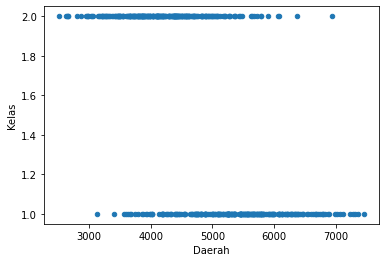

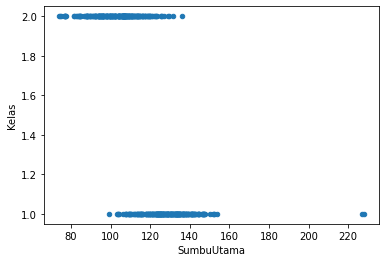

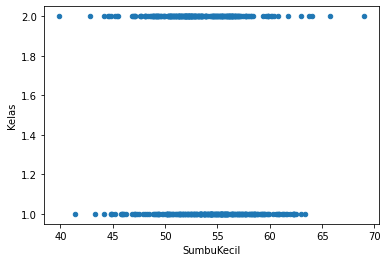

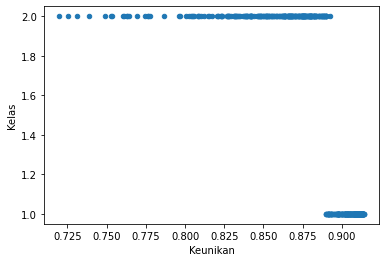

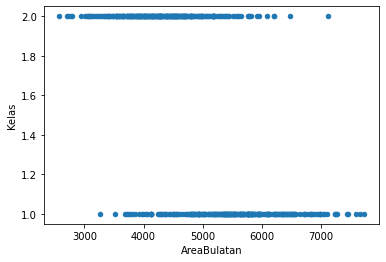

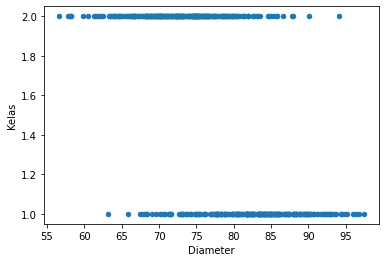

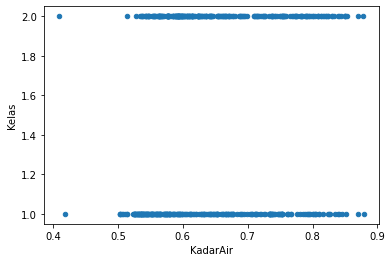

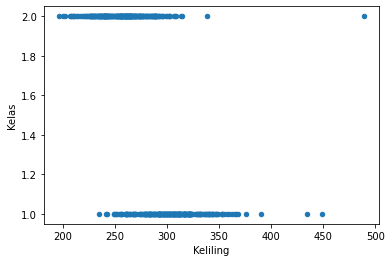

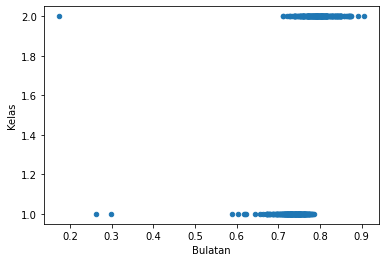

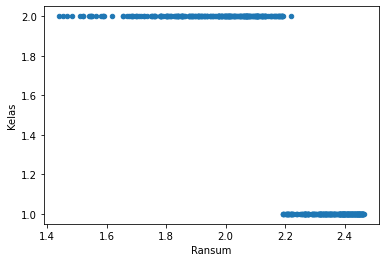

In [51]:
for i in range (data.columns.size):
    if i in [0,11]:
        continue
    else:
        scatterplotKelaswith(data.columns[i])    